In [1]:
from DataBase import DataBase
from utils.utils import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = DataBase('./SPR_db.db')
df = db.to_pandas()
df_metrics = df[['amplitude', 'lcx', 'lcy', 'bm', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

KeyError: "['mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp'] not in index"

In [ ]:
df_metrics.iloc[0::18]

,amplitude,lcx,lcy,bm,mean_mean_pulse,skew_mean,mean_kurt,hysteresis_mean,std_delays,mean_delay,mean_pulse_width,mean_pulse_amp
0,0.001,1.0,0.5,1.0,3940.178762,0.747792,-0.969628,1.043039,8.271806e-25,4.414216e-09,1.703179e-09,13382.588468
18,0.005,1.0,0.5,1.0,2693.209205,1.238485,0.390797,0.922604,0.000000e+00,2.691176e-09,1.412773e-09,11442.443575
36,0.010,1.0,0.5,1.0,3168.653760,0.900784,-0.530208,1.169870,7.471874e-12,2.733798e-09,1.485832e-09,11741.630696
54,0.020,1.0,0.5,1.0,2532.375734,1.393721,0.754698,0.906518,2.602543e-12,2.691924e-09,1.106613e-09,11450.354331
72,0.050,1.0,0.5,1.0,2443.860808,1.458796,0.724121,1.030283,4.161085e-12,2.717784e-09,9.320674e-10,11632.953065
90,0.100,1.0,0.5,1.0,2524.408280,1.445048,0.790594,1.014655,1.853289e-12,2.706337e-09,8.983273e-10,11573.844922
108,0.200,1.0,0.5,1.0,2650.265550,1.422453,0.689065,1.046159,3.508487e-12,2.719739e-09,9.451309e-10,11641.721622
126,0.500,1.0,0.5,1.0,2479.451603,1.457095,0.697388,1.033995,5.019452e-12,2.729048e-09,9.406408e-10,11775.814913
144,0.700,1.0,0.5,1.0,2507.357981,1.425373,0.804344,0.961831,4.849909e-12,2.698373e-09,8.615525e-10,11483.977643
162,1.000,1.0,0.5,1.0,2594.665438,1.394755,0.753159,0.916504,6.522169e-12,2.701193e-09,1.110332e-09,11606.124707


KeyError: 0

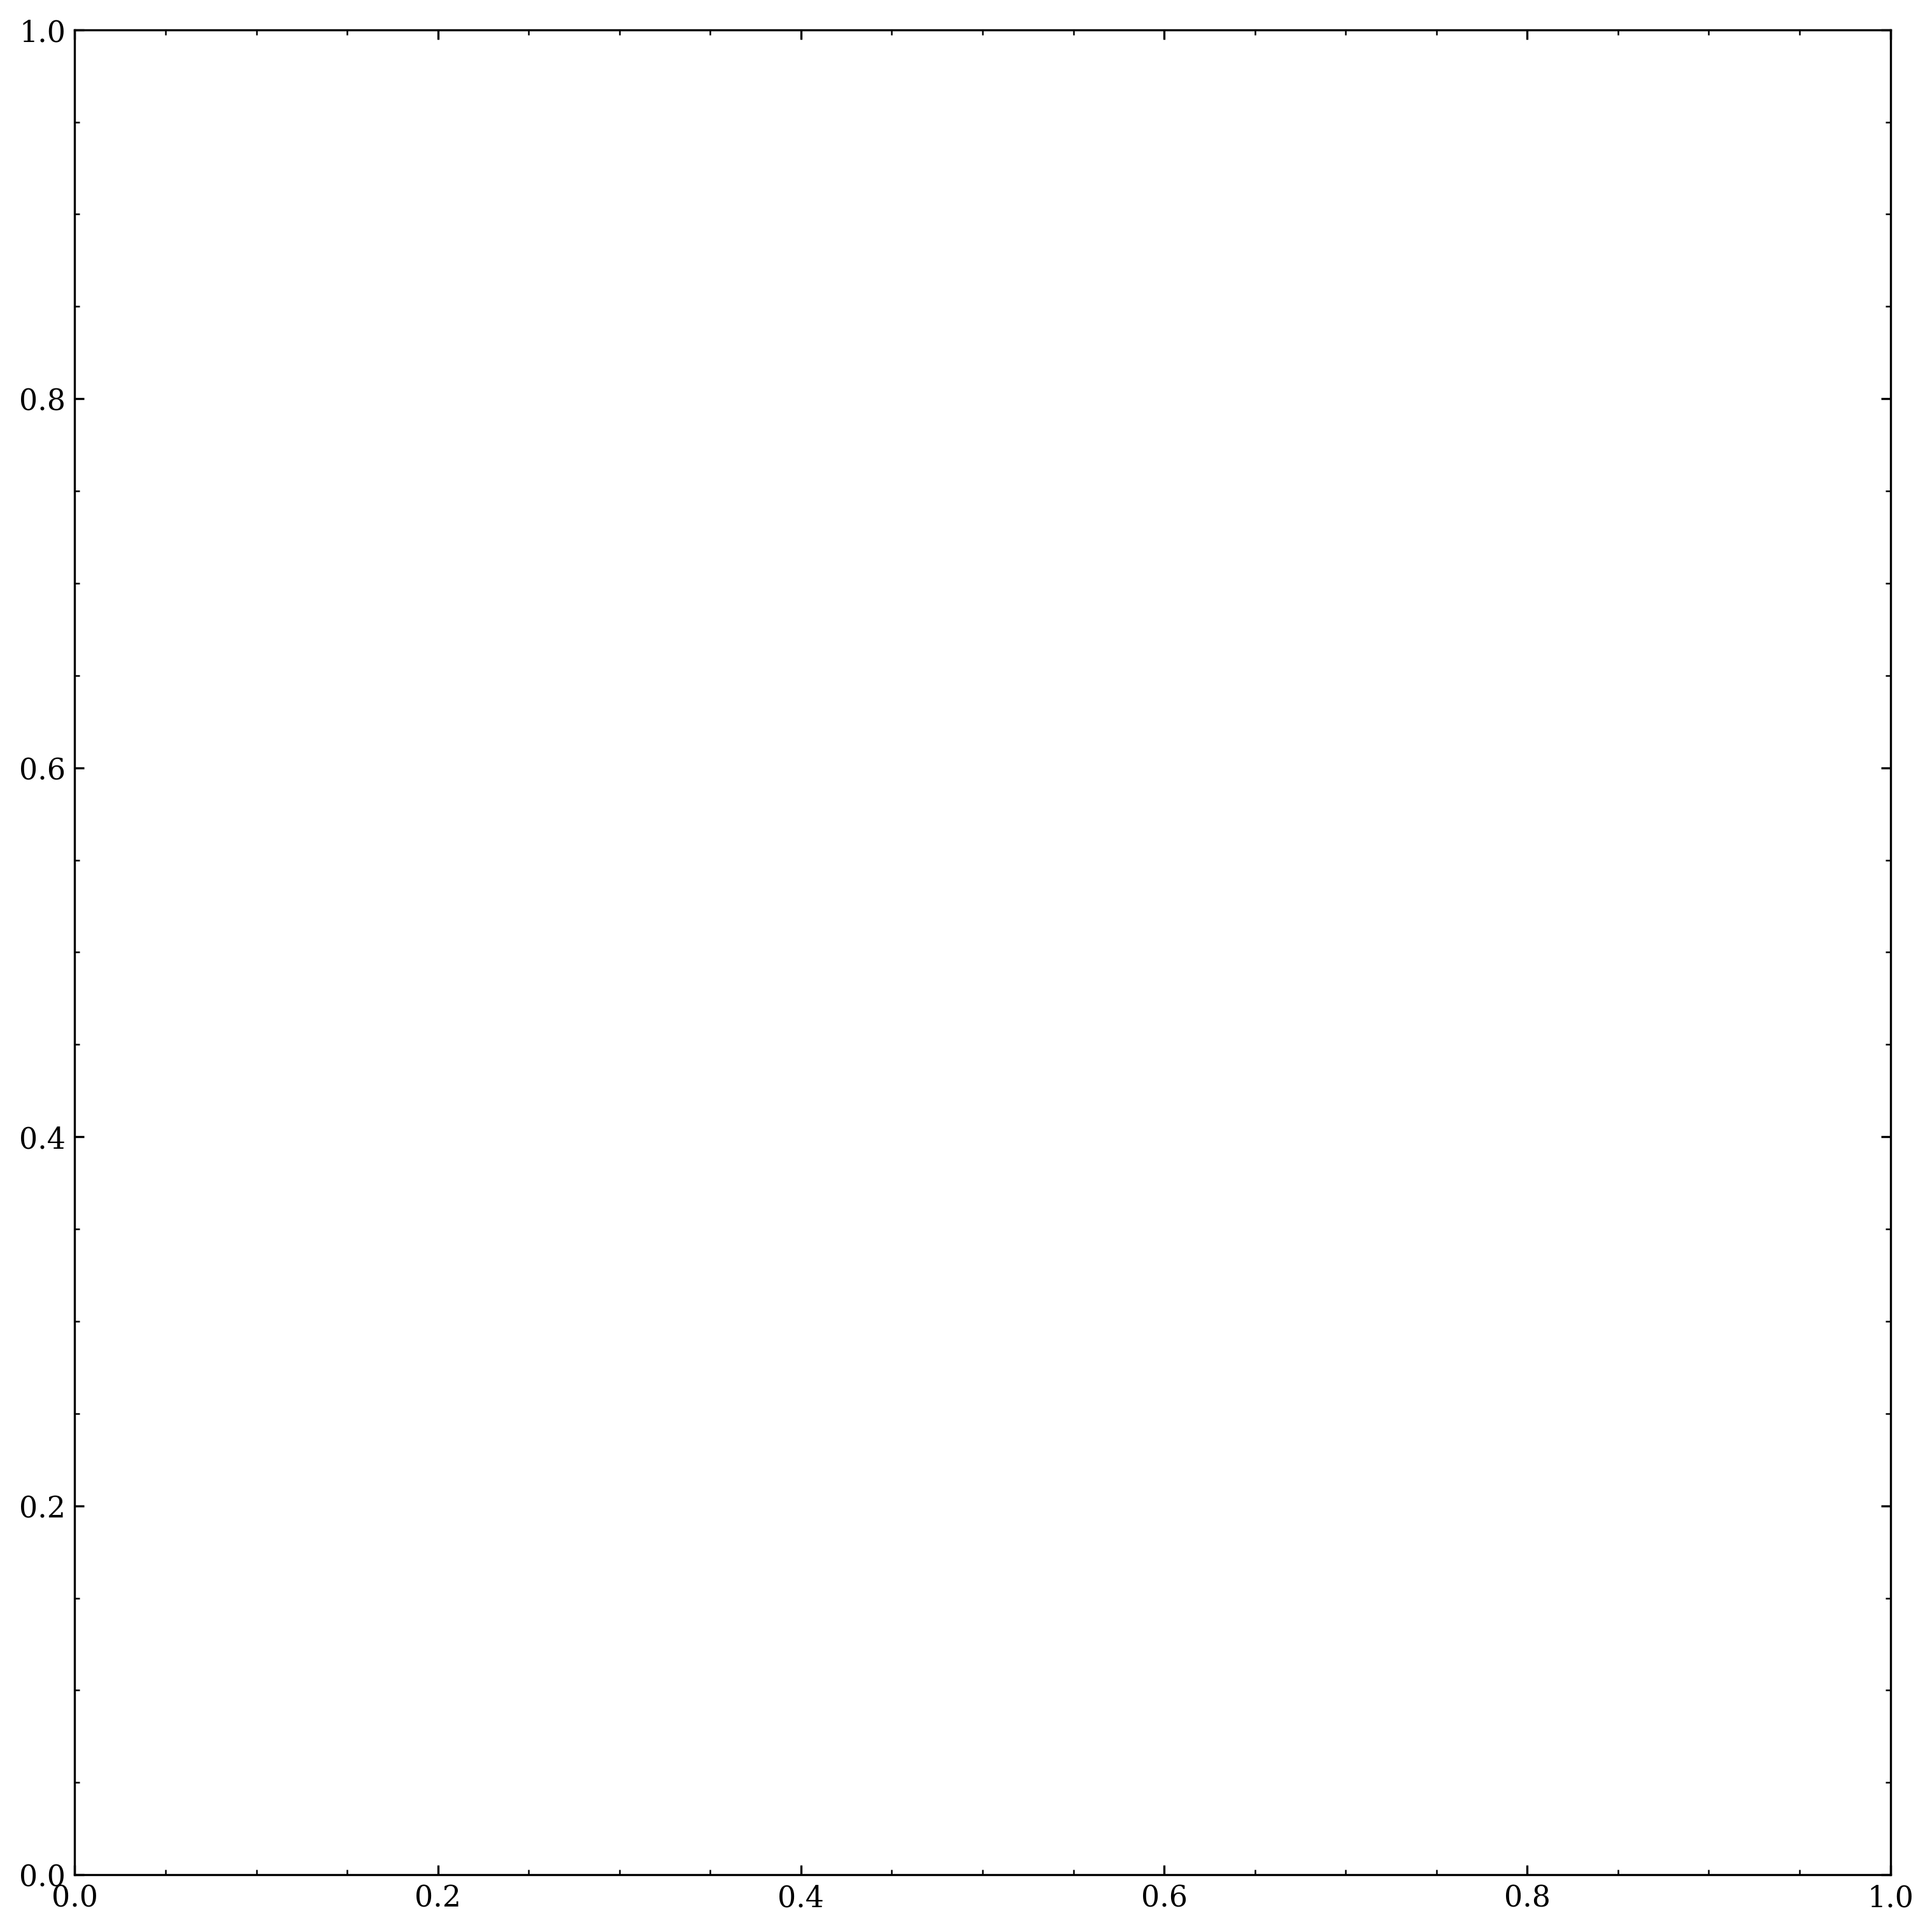

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0,216, 18):
    ax.plot(df['pulse_list'][i], label='pulse_list')


In [3]:
df_metrics['td_0'] = list(df_metrics.iloc[:18]['mean_delay']) * 12

/home/combette/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
df_metrics['true_delay'] = -df_metrics['td_0'] + df_metrics['mean_delay']

/home/combette/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
corr = df_metrics.corr(method = 'spearman')


<AxesSubplot:>

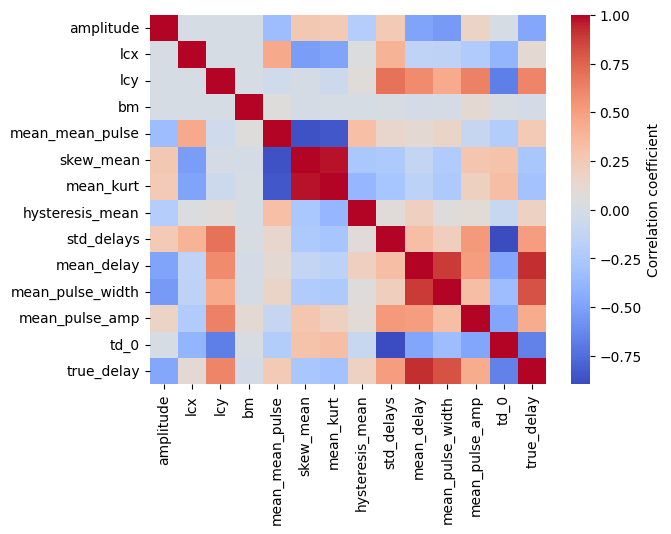

In [6]:
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})

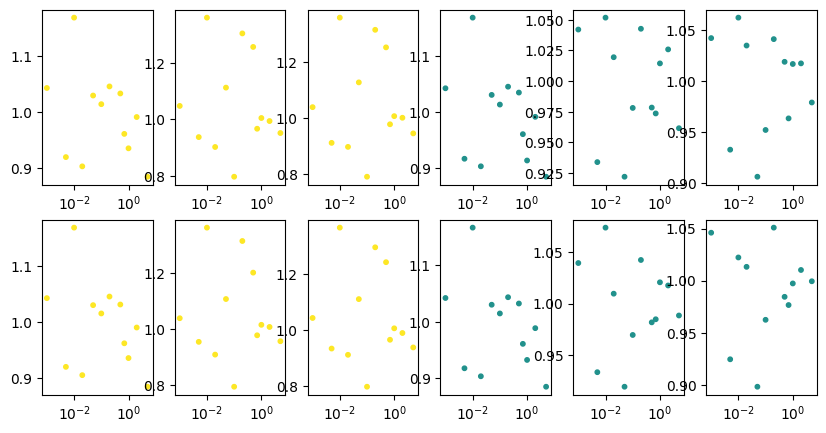

In [38]:
fig, axes = plt.subplots(2,6, figsize = (10, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.scatter(df_metrics['amplitude'].iloc[i::18], df_metrics['hysteresis_mean'].iloc[i::18], s = 10, c=df_metrics['lcx'].iloc[i::18], cmap = 'viridis', vmin=0, vmax=1)
    ax.set_xscale('log')



In [16]:
y = df_metrics[['amplitude', 'lcx', 'lcy','td_0']]
x = df_metrics[['bm', 'mean_mean_pulse', 'skew_mean', 'mean_kurt', 'hysteresis_mean', 'std_delays', 'mean_delay', 'mean_pulse_width', 'mean_pulse_amp']]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=42)


### Linear Regression 

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
model.score(X_test, y_test)

0.40721746440203177

### KNR

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.2000466589900958

### RDM FOREST

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

-0.11618850302053021

### MULTI OUTPUT REGRESSOR : https://machinelearningmastery.com/multi-output-regression-models-with-python/

In [31]:
from sklearn.multioutput import MultiOutputRegressor

#### linear

In [34]:
from sklearn.svm import SVR
model = SVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
wrapper.fit(X_train, y_train)

wrapper.score(X_test, y_test)

-0.17016021094228503

In [37]:
# example of evaluating chained multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn.svm import SVR
# define dataset
# define base model
model = SVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
wrapper.fit(X_train, y_train)
wrapper.score(X_test, y_test)
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate the model and collect the scores
# n_scores = cross_val_score(wrapper, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force the scores to be positive
# n_scores = absolute(n_scores)
# # summarize performance
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

-0.17024338685599336

In [ ]:
import matplotlib.pyplot as plt
g = sns.relplot(
    data=corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 2), edgecolor="0", sizes=(50, 250), legend = False, aspect=1, height=10)
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=90, fontsize = 20)
plt.yticks(rotation=0, fontsize = 20)
plt.savefig('./crrelation_matrix', dpi = 300)